

# Soccer Database Exploration and Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

### Dataset Description 

This soccer database contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. It contains 7 tables (Country , league, match, player, player attribute, team and team attribute), I used DB Browser to explore and to export the data into csv files and i will use those files here.


### Question(s) for Analysis
Which team with the most home wins?

Which team with the most away wins?

what is the relationship between Speed Buildup, Defence Pressure, chance creation with the winning percentage?

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
%matplotlib inline

# Data Wrangling

In [4]:
# importing data that i will use from database soccer
team = pd.read_csv('Team.csv', on_bad_lines='skip')
match = pd.read_csv('Match.csv')
team_att = pd.read_csv('Team_Attributes.csv')
player_att = pd.read_csv('Player_Attributes.csv')
player = pd.read_csv('Player.csv', on_bad_lines='skip')


C:\Users\hebaa\AppData\Local\Temp\ipykernel_2580\1845509555.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  match = pd.read_csv('Match.csv')


In [5]:
match.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1.0,2008/2009,1.0,2008-08-17 00:00:00,492473.0,9987.0,9993.0,1.0,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,2,1,1.0,2008/2009,1.0,2008-08-16 00:00:00,492474.0,10000.0,9994.0,0.0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


In [6]:
match.shape

(27383, 115)

In [7]:
match.dtypes

id             object
country_id     object
league_id     float64
season         object
stage         float64
               ...   
GBD           float64
GBA           float64
BSH           float64
BSD           float64
BSA           float64
Length: 115, dtype: object

# Data Cleaning


***Dropping the none needed columns***

In [8]:
# dropping columns which i will not use
match = match.drop(match.iloc[:,83:],axis = 1)
match = match.drop(match.iloc[:,11:55],axis = 1)
match = match.drop(match.iloc[:,33:],axis =1)
team.drop(["team_short_name", "team_fifa_api_id"], axis = 1, inplace=True)
match.shape

(27383, 33)

***Finding out the rows with missing values***

In [9]:
match.isnull().sum()

id                     1
country_id          1396
league_id           1403
season              1403
stage               1403
date                1403
match_api_id        1403
home_team_api_id    1403
away_team_api_id    1403
home_team_goal      1403
away_team_goal      1403
home_player_1       2628
home_player_2       2719
home_player_3       2685
home_player_4       2727
home_player_5       2720
home_player_6       2729
home_player_7       2631
home_player_8       2713
home_player_9       2677
home_player_10      2840
home_player_11      2959
away_player_1       2638
away_player_2       2682
away_player_3       2697
away_player_4       2725
away_player_5       2739
away_player_6       2717
away_player_7       2639
away_player_8       2745
away_player_9       2732
away_player_10      2845
away_player_11      2958
dtype: int64

***Checking for duplicates***

In [14]:
match.duplicated().sum()

1020

# Exploratory Data Analysis

### Research Question 1 (Which team with the most home wins?!)

In [15]:
#making a function to evaluate the result of matches
def match_result(home_goals,away_goals):
    if (home_goals > away_goals):
        return 'home wins'
    elif (home_goals < away_goals):
        return 'away wins'
    else:
        return 'tie'

In [16]:
#making a new result column to show the result of matches
match['result'] = match.apply(lambda row: match_result(row['home_team_goal'],row['away_team_goal']), axis=1 )

In [15]:
match.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,result
0,1,1,1.0,2008/2009,1.0,2008-08-17 00:00:00,492473.0,9987.0,9993.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tie
1,2,1,1.0,2008/2009,1.0,2008-08-16 00:00:00,492474.0,10000.0,9994.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tie


***Create a visualization comparing the number of home winning and away winning and tie***

<AxesSubplot:>

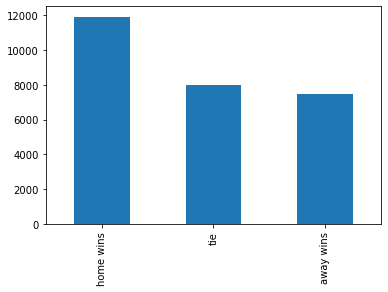

In [17]:
match['result'].value_counts().plot(kind='bar')

> This plot shows that teams is most likely win home than away.

In [18]:
#filtering with home wins
winning_home= match[match['result']=='home wins']
winning_home.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,result
3,4,1,1.0,2008/2009,1.0,2008-08-17 00:00:00,492476.0,9991.0,9998.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home wins
8,9,1,1.0,2008/2009,1.0,2008-08-16 00:00:00,492481.0,10001.0,9986.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home wins
9,10,1,1.0,2008/2009,10.0,2008-11-01 00:00:00,492564.0,8342.0,8571.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home wins
21,22,1,1.0,2008/2009,11.0,2008-11-07 00:00:00,492576.0,9984.0,10000.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home wins
25,26,1,1.0,2008/2009,11.0,2008-11-08 00:00:00,492580.0,10001.0,9987.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home wins


In [19]:
#which team id has the most home wins?
winning_home['home_team_api_id'].value_counts()

8634.0      131
8633.0      129
9925.0      120
10260.0     116
8456.0      113
           ... 
108893.0      2
8262.0        2
2.2           1
7869.0        1
8457.0        1
Name: home_team_api_id, Length: 299, dtype: int64

In [20]:
#Accessing the team name from team table
team[team['team_api_id'] == 8634]

,id,team_api_id,team_long_name
257,43042,8634,FC Barcelona


# Research Question 2  (Which team with the most away wins?)

In [21]:
#filtering with home wins
winning_away= match[match['result']=='away wins']
winning_away.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,result
2,3,1,1.0,2008/2009,1.0,2008-08-16 00:00:00,492475.0,9984.0,8635.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,away wins
4,5,1,1.0,2008/2009,1.0,2008-08-16 00:00:00,492477.0,7947.0,9985.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,away wins
7,8,1,1.0,2008/2009,1.0,2008-08-16 00:00:00,492480.0,4049.0,9996.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,away wins
10,11,1,1.0,2008/2009,10.0,2008-10-31 00:00:00,492565.0,9985.0,9986.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,away wins
11,12,1,1.0,2008/2009,10.0,2008-11-02 00:00:00,492566.0,10000.0,9991.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,away wins


In [22]:
#which team id has the most away wins?
winning_away['away_team_api_id'].value_counts()

8634.0    103
8633.0     99
9925.0     98
9885.0     84
9823.0     84
         ... 
6367.0      1
8550.0      1
9867.0      1
9858.0      1
8388.0      1
Name: away_team_api_id, Length: 299, dtype: int64

In [23]:
#Accessing the team name from team table
#I think I know this one :)
team[team['team_api_id'] == 8634]

,id,team_api_id,team_long_name
257,43042,8634,FC Barcelona


# Research Question 3  (what is the relationship between Speed Buildup, Defence Pressure, chance creation with the winning percentage?)

In [24]:
team_att.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


***Checking the distribution of Buildup speed for all teams***

array([[<AxesSubplot:title={'center':'buildUpPlaySpeed'}>,
        <AxesSubplot:title={'center':'chanceCreationShooting'}>,
        <AxesSubplot:title={'center':'defencePressure'}>]], dtype=object)

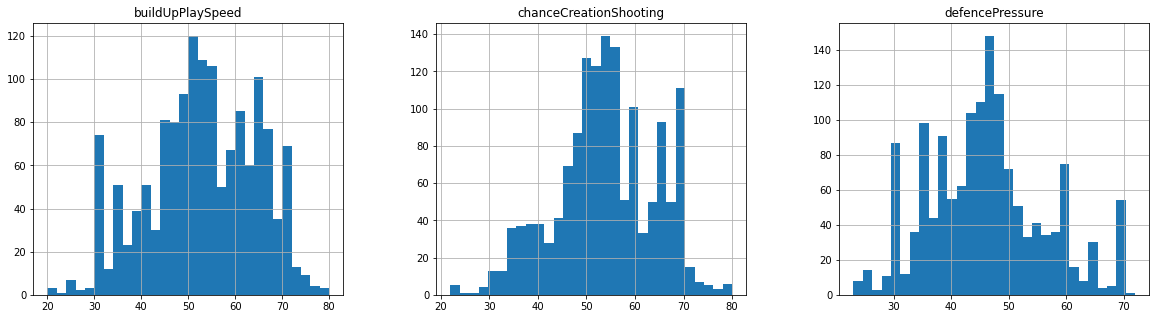

In [35]:
team_att[['buildUpPlaySpeed', 'chanceCreationShooting', 'defencePressure']].hist(figsize = (20, 5), layout = (1, 3),bins=30)

> the distribution of chance creation and defense pressure is slightly normal. however the distribution of buildup speed is left skewed.

In [37]:
#making new df with the mean buildup speed grouping by team id
df = pd.DataFrame(team_att.groupby('team_api_id')['buildUpPlaySpeed'].mean())
df.head(2)

,buildUpPlaySpeed
team_api_id,
1601,47.333333
1773,52.000000


In [38]:
#Joinning team table with df to access the name of the teams
new_df = team.merge(df, left_on='team_api_id', right_on='team_api_id',how='inner')
new_df  = new_df.sort_values(by = 'buildUpPlaySpeed',ascending = False,ignore_index = True)
new_df.head(10)

,id,team_api_id,team_long_name,buildUpPlaySpeed
0,15620,9789,Borussia Dortmund,72.500000
1,20531,8600,Udinese,71.000000
2,39387,8596,Falkirk,70.000000
3,37696,158085,FC Arouca,67.000000
4,15619,8178,Bayer 04 Leverkusen,66.833333
5,19305,8460,SC Paderborn 07,66.000000
6,3465,10252,Aston Villa,65.666667
7,31451,8244,Widzew Łódź,65.250000
8,32409,8024,Widzew Łódź,65.250000
9,13,9999,KSV Roeselare,65.000000


In [39]:
#Making new column all matches which is the number of all matches for each team
s = []
for a in new_df['team_api_id']:
    s.append(match.query(f'home_team_api_id == {a} or away_team_api_id == {a}').shape[0])
new_df['all matches'] = s
new_df.head(5)

,id,team_api_id,team_long_name,buildUpPlaySpeed,all matches
0,15620,9789,Borussia Dortmund,72.500000,272
1,20531,8600,Udinese,71.000000,302
2,39387,8596,Falkirk,70.000000,76
3,37696,158085,FC Arouca,67.000000,98
4,15619,8178,Bayer 04 Leverkusen,66.833333,272


In [40]:
#Making new column 'matches won' which displayes the number of matches won by each team
u = []
for i in new_df['team_api_id']:
    u.append(match.query(f'home_team_api_id == {i} and result == "home wins" or away_team_api_id == {i} and result == "away wins"').shape[0])
new_df['matches won']= u
new_df.head()

,id,team_api_id,team_long_name,buildUpPlaySpeed,all matches,matches won
0,15620,9789,Borussia Dortmund,72.500000,272,157
1,20531,8600,Udinese,71.000000,302,115
2,39387,8596,Falkirk,70.000000,76,15
3,37696,158085,FC Arouca,67.000000,98,28
4,15619,8178,Bayer 04 Leverkusen,66.833333,272,137


In [41]:
#Making new column with winning percentage
new_df['winning percentage'] = new_df['matches won']/new_df['all matches']
new_df.head(5)

,id,team_api_id,team_long_name,buildUpPlaySpeed,all matches,matches won,winning percentage
0,15620,9789,Borussia Dortmund,72.500000,272,157,0.577206
1,20531,8600,Udinese,71.000000,302,115,0.380795
2,39387,8596,Falkirk,70.000000,76,15,0.197368
3,37696,158085,FC Arouca,67.000000,98,28,0.285714
4,15619,8178,Bayer 04 Leverkusen,66.833333,272,137,0.503676


In [42]:
#making new df with the mean defence pressure grouping by team id
defence = pd.DataFrame(team_att.groupby('team_api_id')['defencePressure'].mean())
defence.head(2)

,defencePressure
team_api_id,
1601,47.166667
1773,43.000000


In [43]:
#Joinning the defence df with our new df
new_df = new_df.merge(defence, left_on='team_api_id', right_on='team_api_id',how='inner')
new_df.head(2)

,id,team_api_id,team_long_name,buildUpPlaySpeed,all matches,matches won,winning percentage,defencePressure
0,15620,9789,Borussia Dortmund,72.5,272,157,0.577206,59.333333
1,20531,8600,Udinese,71.0,302,115,0.380795,40.666667


In [45]:
#making chances df with the mean chance creation shooting grouping by team id
chances = pd.DataFrame(team_att.groupby('team_api_id')['chanceCreationShooting'].mean())
chances.head(2)

,chanceCreationShooting
team_api_id,
1601,53.5
1773,54.0


In [46]:
#Joinning the chances df with our new df
new_df = new_df.merge(chances, left_on='team_api_id', right_on='team_api_id',how='inner')
new_df.head(3)

,id,team_api_id,team_long_name,buildUpPlaySpeed,all matches,matches won,winning percentage,defencePressure,chanceCreationShooting
0,15620,9789,Borussia Dortmund,72.5,272,157,0.577206,59.333333,66.333333
1,20531,8600,Udinese,71.0,302,115,0.380795,40.666667,54.333333
2,39387,8596,Falkirk,70.0,76,15,0.197368,60.000000,70.000000


Text(0, 0.5, 'winning percentage')

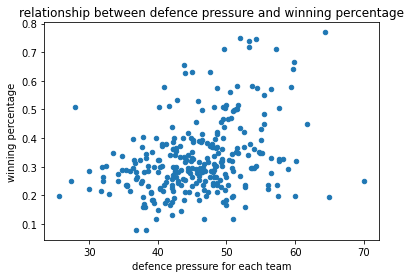

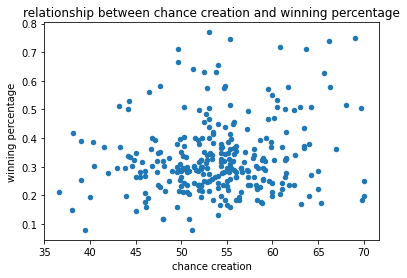

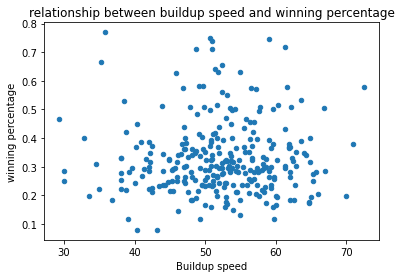

In [47]:
new_df.plot(x='defencePressure',y='winning percentage',kind='scatter')
plt.title('relationship between defence pressure and winning percentage')
plt.xlabel('defence pressure for each team')
plt.ylabel('winning percentage')
new_df.plot(x='chanceCreationShooting',y='winning percentage',kind='scatter')
plt.title('relationship between chance creation and winning percentage')
plt.xlabel('chance creation')
plt.ylabel('winning percentage')
new_df.plot(x='buildUpPlaySpeed',y='winning percentage',kind='scatter')
plt.title('relationship between buildup speed and winning percentage')
plt.xlabel('Buildup speed')
plt.ylabel('winning percentage')

In [49]:
new_df.corr()

,id,team_api_id,buildUpPlaySpeed,all matches,matches won,winning percentage,defencePressure,chanceCreationShooting
id,1.000000,-0.047557,-0.282214,0.046648,0.037659,0.022656,-0.048283,0.152793
team_api_id,-0.047557,1.000000,0.040682,-0.132044,-0.105244,-0.086593,-0.103457,-0.109195
buildUpPlaySpeed,-0.282214,0.040682,1.000000,0.066084,0.048678,0.019557,-0.047202,-0.011208
all matches,0.046648,-0.132044,0.066084,1.000000,0.882676,0.663014,0.165741,0.085431
matches won,0.037659,-0.105244,0.048678,0.882676,1.000000,0.908037,0.284391,0.154921
winning percentage,0.022656,-0.086593,0.019557,0.663014,0.908037,1.000000,0.343037,0.172634
defencePressure,-0.048283,-0.103457,-0.047202,0.165741,0.284391,0.343037,1.000000,0.230712
chanceCreationShooting,0.152793,-0.109195,-0.011208,0.085431,0.154921,0.172634,0.230712,1.000000


# Limitations

**There are some limitations listed below to the analysis which arise due the data in question.**

- There are lot of columns in the tables for example Match table has 115 columns out which most of them do not have a proper explanationof what it is all about.
- There are some outliers in the dataset which I didn't deal with properly.

# Conclusions



FC Barcelona was the best team in the world with the most away/home wins between 2008 and 2016.

Unfortunately, there is no correlation between buildup speed or chance creation and winning percentage.
However, there is a slight correlation between defense pressure with winning percentage.